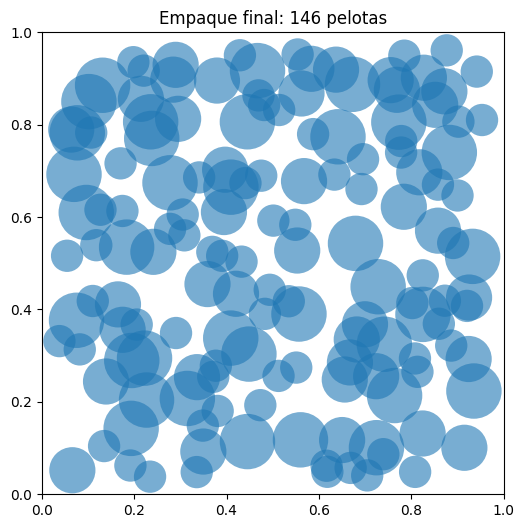

Pelotas insertadas: 146
Densidad de empaque (2D): 0.983


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# -----------------------------
# Parámetros iniciales
# -----------------------------
np.random.seed(42)

box_size = 1.0
radii_types = [0.035, 0.05, 0.06]   # radios (m)
max_pelotas = 200                   # máximo de intentos de inserción
max_iter = 200                      # iteraciones por paso
temperature = 0.01                  # temperatura inicial
cooling_rate = 0.995                # enfriamiento gradual
positions, radii = [], []

# -----------------------------
# Funciones auxiliares
# -----------------------------
def dentro_de_caja(pos, r):
    """Verifica si el círculo está dentro del contenedor."""
    return (r < pos[0] < box_size - r) and (r < pos[1] < box_size - r)

def hay_solapamiento(pos, r, positions, radii):
    """Verifica si el círculo se solapa con alguno existente."""
    for (p, rr) in zip(positions, radii):
        if np.linalg.norm(np.array(pos) - np.array(p)) < (r + rr):
            return True
    return False

def energia_total(positions, radii):
    """Suma de solapamientos al cuadrado (energía)."""
    E = 0
    for i in range(len(positions)):
        for j in range(i+1, len(positions)):
            d = np.linalg.norm(np.array(positions[i]) - np.array(positions[j]))
            overlap = radii[i] + radii[j] - d
            if overlap > 0:
                E += overlap**2
    return E

# -----------------------------
# Algoritmo de inserción + Metropolis
# -----------------------------
for intento in range(max_pelotas):
    # Escoge un radio aleatorio (tipo de pelota)
    r = np.random.choice(radii_types)
    # Intenta colocarla aleatoriamente
    for _ in range(200):
        pos = np.random.rand(2) * (box_size - 2*r) + r
        if not hay_solapamiento(pos, r, positions, radii) and dentro_de_caja(pos, r):
            positions.append(pos)
            radii.append(r)
            break

    # Relajación local con Metropolis–Annealing
    for _ in range(max_iter):
        i = np.random.randint(len(positions))
        old_pos = positions[i].copy()
        new_pos = old_pos + np.random.normal(scale=0.02, size=2)
        if not dentro_de_caja(new_pos, radii[i]):
            continue
        temp_positions = positions.copy()
        temp_positions[i] = new_pos
        E_old = energia_total(positions, radii)
        E_new = energia_total(temp_positions, radii)
        dE = E_new - E_old
        if dE < 0 or np.random.rand() < np.exp(-dE / temperature):
            positions[i] = new_pos
    temperature *= cooling_rate

# -----------------------------
# Visualización
# -----------------------------
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
ax.set_aspect('equal')
ax.set_title(f"Empaque final: {len(positions)} pelotas")

for (p, r) in zip(positions, radii):
    circle = plt.Circle(p, r, alpha=0.6)
    ax.add_patch(circle)

plt.show()

# -----------------------------
# Métricas
# -----------------------------
V_total = box_size**2
V_pelotas = np.sum([np.pi * r**2 for r in radii])
densidad = V_pelotas / V_total

print(f"Pelotas insertadas: {len(positions)}")
print(f"Densidad de empaque (2D): {densidad:.3f}")